In [1]:
import numpy as np
import matplotlib.pyplot as plt

Time vector is uniformly spaced: True
Δt[0] = 0.0100000000
Δt[1] = 0.0100000000
Δt[2] = 0.0100000000
Δt[3] = 0.0100000000
Δt[4] = 0.0100000000
Sampling interval (s): 0.01
Sampling frequency (Hz): 100.0


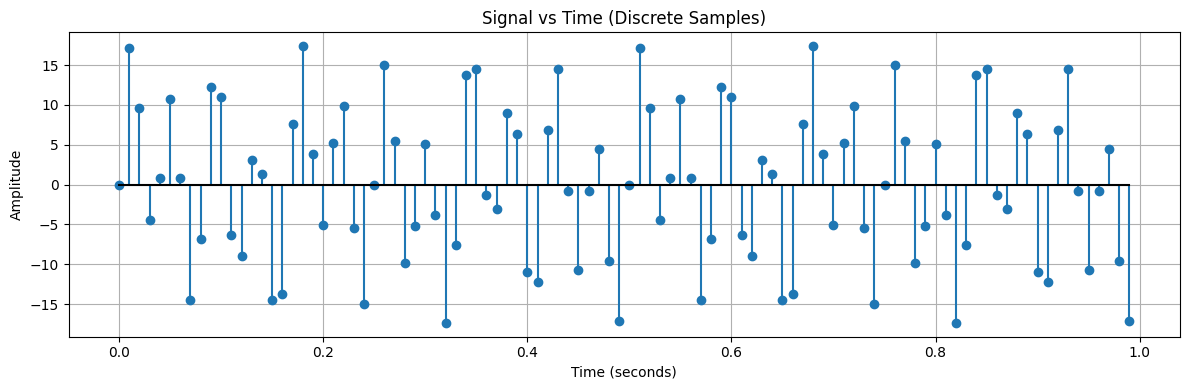

In [2]:
data = np.load(r'/Users/chandhu/Desktop/4th sem/image processing/A2/signal_1.npy')

time = data[:, 0]
amplitude = data[:, 1]

dt = np.diff(time)
is_uniform = np.allclose(dt, dt[0])
print("Time vector is uniformly spaced:", is_uniform)

for i in range(5):
    print(f"Δt[{i}] = {time[i+1] - time[i]:.10f}")

sampling_interval = time[1] - time[0]
Fs = 1 / sampling_interval
print("Sampling interval (s):", sampling_interval)
print("Sampling frequency (Hz):", Fs)

plt.figure(figsize=(12, 4))
plt.stem(time, amplitude, basefmt="k-")
plt.title("Signal vs Time (Discrete Samples)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. Part(a) Plotting the signal



---
First the signal is checked if it's uniformly sampled or not and the neighbouring samples are subtracted to find the sampling interval.

The uniformly spaced initial 5 samples of the signal is shown in the output to show that it is uniformly spaced.

1/sampling_interval is the sampling frequency which is 100 in this case which means 100 samples of signal are taking in 1 second which are shown in the output.



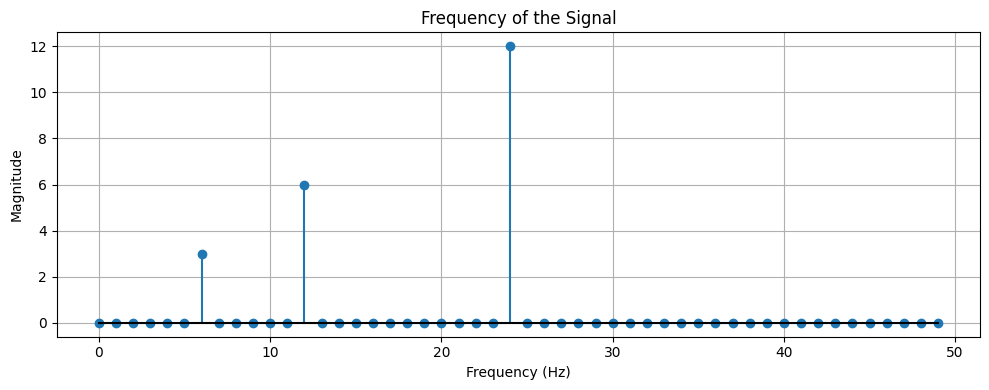

In [3]:
data = np.load(r'/Users/chandhu/Desktop/4th sem/image processing/A2/signal_1.npy')
time = data[:, 0]
amplitude = data[:, 1]
T_s = time[1] - time[0]        
F_s = 1 / T_s                
N = len(amplitude)          



fft_result = np.fft.fft(amplitude)
frequencies = np.fft.fftfreq(N, d=T_s)

positive_freqs = frequencies[:N//2]
magnitudes = np.abs(fft_result[:N//2]) * 2 / N  

plt.figure(figsize=(10, 4))
plt.stem(positive_freqs, magnitudes, basefmt="k-")
plt.title("Frequency of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. Part(b) Frequency components in the signal
___

Fast Fourier Transform (FFT) is done to the signal and normalised to reconstruct the original signal and find the frequency and magnitude.

Normalisation  is required in FFT to obtain the actual amplitude of the signal or without normalisation amplitude will depend on the number of samples taken.

As we can see in the output it has :

Frequency: 24Hz, Magnitude: 12

Frequency: 12Hz, Magnitude: 6

Frequency: 6Hz, Magnitude: 3


### 1. Part(c) Expression for the continous time signal



---

To find the continuous-time signal from which the signal was sampled, we use the frequency components using the Fast Fourier Transform and reconstruct the signal using a sum of cosine functions at those frequencies.

The signal is sampled at regular time intervals \( T_s \), which gives:

$$
x[n] = x(nT_s), \quad n = 0, 1, 2, \dots, N-1
$$

Where:

$$
T_s = \frac{1}{F_s} \quad \text{(sampling interval)}
$$

$$
F_s \quad \text{is the sampling frequency}
$$

Fast Fourier Transform (FFT) is applied to the sampled signal to find its frequency components.

The FFT gives both magnitude and frequency:

$$
f_k = \frac{k}{N} F_s
$$

We can express the signal using only cosine terms as given:

$$
x(t) = \sum_k A_k \cos(2\pi f_k t + \phi_k)
$$

Consider phase is 0, then:

$$
x(t) = \sum_k A_k \cos(2\pi f_k t)
$$


From the output we can see the frequency componenets and their magnitudes:

$$
f = 24 \, \text{Hz}, \quad A = 12
$$

$$
f = 12 \, \text{Hz}, \quad A = 6
$$

$$
f = 6 \, \text{Hz}, \quad A = 3
$$

With all 3 signals together the continuous-time signal is:

$$
x(t) = 12 \cos(2\pi \cdot 24 \cdot t) + 6 \cos(2\pi \cdot 12 \cdot t) + 3 \cos(2\pi \cdot 6 \cdot t)
$$

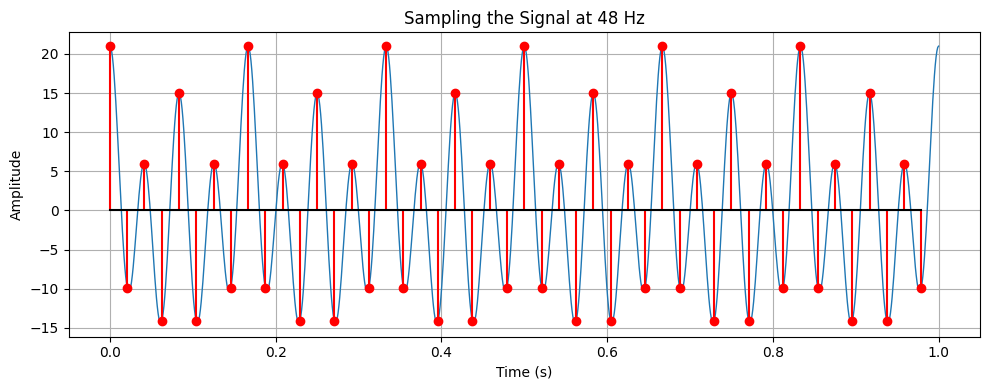

Blue line is original signal
Red samples are the sampled signal at 48HZ


In [4]:
t_cont = np.linspace(0, 1, 1000)
x_cont = 12 * np.cos(2 * np.pi * 24 * t_cont) + 6 * np.cos(2 * np.pi * 12 * t_cont) + 3 * np.cos(2 * np.pi * 6 * t_cont)

Fs_new = 48
Ts_new = 1 / Fs_new
t_sampled = np.arange(0, 1, Ts_new)
x_sampled = 12 * np.cos(2 * np.pi * 24 * t_sampled) + 6 * np.cos(2 * np.pi * 12 * t_sampled) + 3 * np.cos(2 * np.pi * 6 * t_sampled)

plt.figure(figsize=(10, 4))
plt.plot(t_cont, x_cont, linewidth=1)
plt.stem(t_sampled, x_sampled, linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title("Sampling the Signal at 48 Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()
print("Blue line is original signal")
print("Red samples are the sampled signal at 48HZ")

### 1. Part(d) Signal sampled at 48Hz.



---
Initially the continous time signal equation is written down and computed by taking 1000 points between 0 to 1 seconds.

Now the signal is sampled at 48 equally spaced points which means the sampling_interval = 1/48 = 0.0208.

So now the signal is sampled every 0.0208 seconds.

Here there is no aliasing beacuase the maximum frequency in the signal is 24Hz and it is sampled at exactly 48Hz that is twice the maximum frequency present in the signal.

$$
F_s \geq 2 f_{\text{max}} = 2 \cdot 24 = 48 \, \text{Hz}
$$


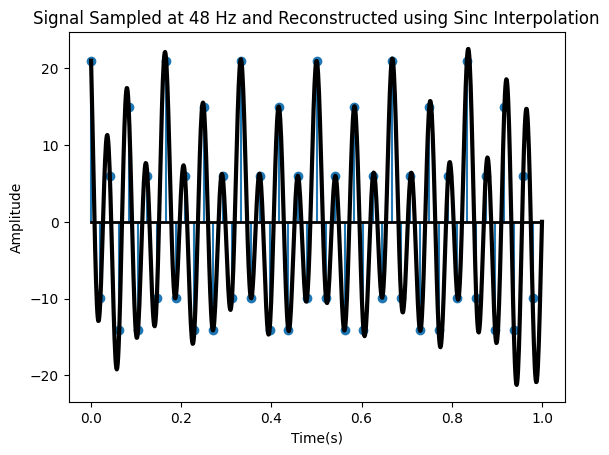

In [5]:
Fs = 48                           
Ts = 1.0 / Fs                     
t_sampled = np.arange(0, 1, Ts)   


x_sampled = 12 * np.cos(2 * np.pi * 24 * t_sampled) + 6 * np.cos(2 * np.pi * 12 * t_sampled) + 3 * np.cos(2 * np.pi * 6 * t_sampled)

ml, sl, bl = plt.stem(t_sampled, x_sampled)
plt.setp(bl, 'color', 'k', 'linewidth', 2)
bl.set_xdata([0, 1])  # stem base line


def reconstruct(t):
    x_r = 0
    for i in range(len(t_sampled)):
        x_r += x_sampled[i] * np.sinc(Fs * t - i)
    return x_r


t_dense = np.linspace(0, 1, 1000)
plt.plot(t_dense, reconstruct(t_dense), 'k-', linewidth=3)
plt.title("Signal Sampled at 48 Hz and Reconstructed using Sinc Interpolation")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.show()

### 1. Part(d) Signal sampled at 48Hz and Reconstructed using Sinc interpolation.



---
The initial sampled frequency is 48Hz

The function used reconstructs the original signal using sinc interpolation.


### Sinc Interpolation Formula

The continuous-time signal \( x(t) \) reconstructed from its samples \( x[n] \), taken at sampling interval \( T_s \), is given by:

$$
x(t) = \sum_{n=0}^{N-1} x[n] \cdot \text{sinc}\left( \frac{t - nT_s}{T_s} \right)
$$

Where:

$$
T_s = \frac{1}{F_s} \quad \text{(sampling interval)}
$$

$$
\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x} \quad \text{(sinc function)}
$$


### Sinc Interpolation Formula (Scaled Form) using sampling frequency directly

The continuous-time signal \( x(t) \) can also be reconstructed from its samples using the scaled sinc form:

$$
x(t) = \sum_{n=0}^{N-1} x[n] \cdot \text{sinc}(F_s \cdot t - n)
$$

Where:

$$
F_s \quad \text{is the sampling frequency}
$$

$$
\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x} \quad \text{is the normalized sinc function}
$$


Hence, this gives the 48Hz sampled signal reconstructed using sinc interpolation.

### 1. Part(e) Sampling frequency without aliasing.



---

We know that 
$$
F_s \geq 2 f_{\text{max}} = 2 \cdot 24 = 48 \, \text{Hz}
$$

In the three cosine signal which are found the maximum frequency is 24 therefore the minimum sampling frquency without aliasing is 2*24 = 48

48Hz sampled signal is already in the output for part(d) which shows that there is no aliasing. 

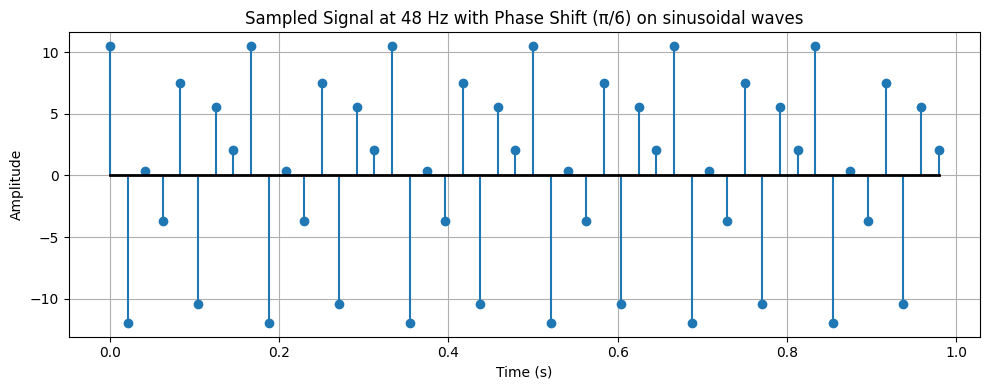

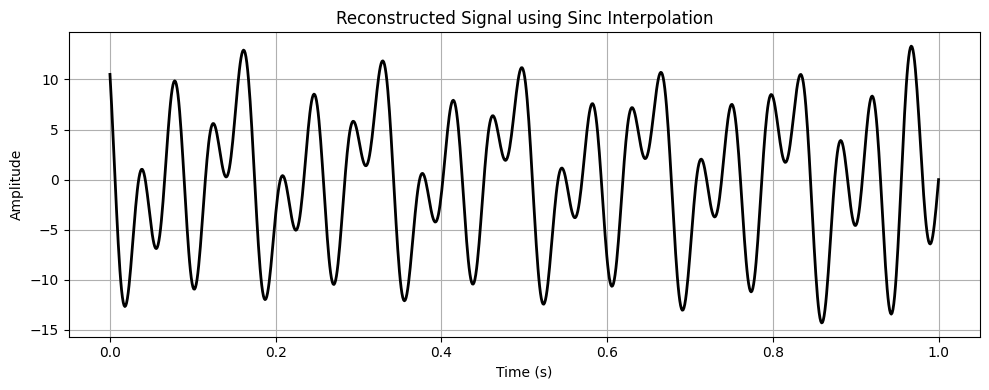

In [6]:
Fs = 48                               
Ts = 1 / Fs                           
t_sampled = np.arange(0, 1, Ts)       
x_sampled = 12 * np.sin(2 * np.pi * 24 * t_sampled + 5*np.pi/6) + 6 * np.sin(2 * np.pi * 12 * t_sampled + 5*np.pi/6) + 3 * np.sin(2 * np.pi * 6 * t_sampled + 5*np.pi/6)

plt.figure(figsize=(10, 4))
ml, sl, bl = plt.stem(t_sampled, x_sampled, basefmt='k-')
plt.setp(bl, 'color', 'k', 'linewidth', 2)
plt.title("Sampled Signal at 48 Hz with Phase Shift (π/6) on sinusoidal waves")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

def sinc_reconstruct(t):
    x_recon = np.zeros_like(t)
    for i in range(len(t_sampled)):
        x_recon += x_sampled[i] * np.sinc(Fs * (t - t_sampled[i]))
    return x_recon

t_dense = np.linspace(0, 1, 1000)
x_reconstructed = sinc_reconstruct(t_dense)

plt.figure(figsize=(10, 4))
plt.plot(t_dense, x_reconstructed, 'k-', linewidth=2)
plt.title("Reconstructed Signal using Sinc Interpolation")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. Part(f) Adding π/3 phase to the sinusoidal components.



---
We modify the original continuous-time signal by adding a phase shift of pi/3 to all sinusoidal components.

The original signal is of the cosine form :

$$
x(t) = 12 \cos(2\pi \cdot 24 t) + 6 \cos(2\pi \cdot 12 t) + 3 \cos(2\pi \cdot 6 t)
$$

Now convert the cosine equation to sine form by adding a phase shift of pi/2
$$
\cos(\omega t) = \sin\left(\omega t + \frac{\pi}{2} \right)
$$

Adding an additional phase shift of pi/3 it becomes:

$$
\frac{\pi}{2} + \frac{\pi}{3} = \frac{5\pi}{6}
$$

So the phase-shifted sine form of the signal is:

$$
x(t) = 12 \sin\left(2\pi \cdot 24 t + \frac{5\pi}{6} \right) + 6 \sin\left(2\pi \cdot 12 t + \frac{5\pi}{6} \right) + 3 \sin\left(2\pi \cdot 6 t + \frac{5\pi}{6} \right)
$$

The signal is sampled at 48Hz

Since the highest frequency component is 24 Hz, there will be no aliasing:

$$
F_s \geq 2 \cdot f_{\text{max}} = 2 \cdot 24 = 48 \, \text{Hz}
$$

The sampled signal is then reconstructed using sinc interpolation:

$$
x(t) = \sum_{n=0}^{N-1} x[n] \cdot \text{sinc}(F_s \cdot t - n)
$$


The amplitude is different because we added a phase shift to each of the sinusoidal components. 

In the original signal, all the cosine waves started at the same phase, so their peaks lined up perfectly which made add up constructively at certain points, giving a maximum amplitude of around 21.

But after adding a phase shift (π/3), the sine waves no longer peak at the same time. Since they are out of phase, they don’t add up as strongly at any single point.

As a result, the overall amplitude of the signal appears lower, even though the frequency components and their individual magnitudes are the same.

So, the signal’s shape is shifted, and its maximum amplitude is reduced because of the misalignment caused by the phase shift.


DFT Magnitude Analysis for Signal A: x[n] = {1, 1, 1, 1, 0, 0, 0, 0}


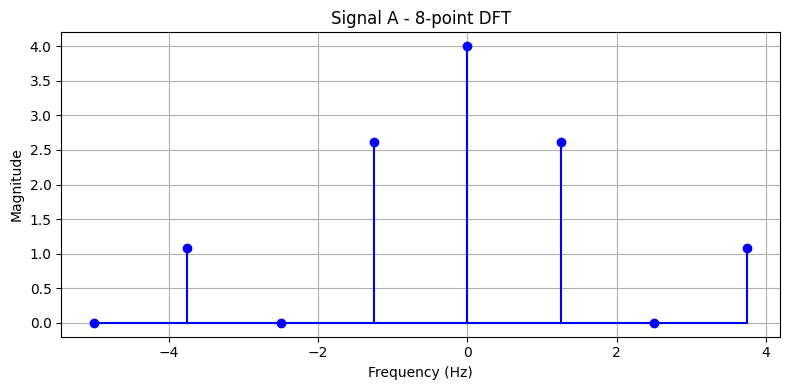

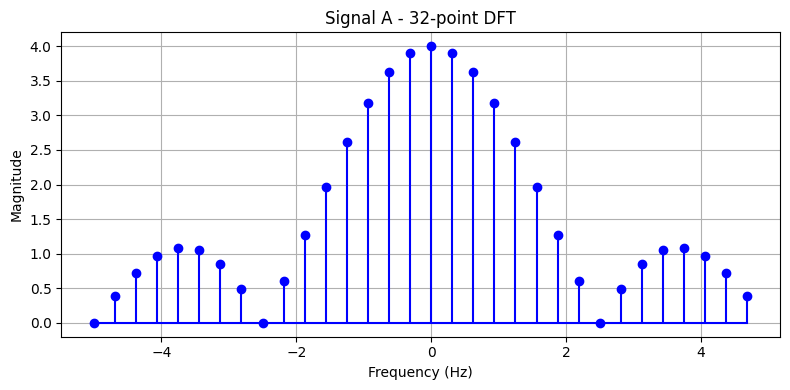

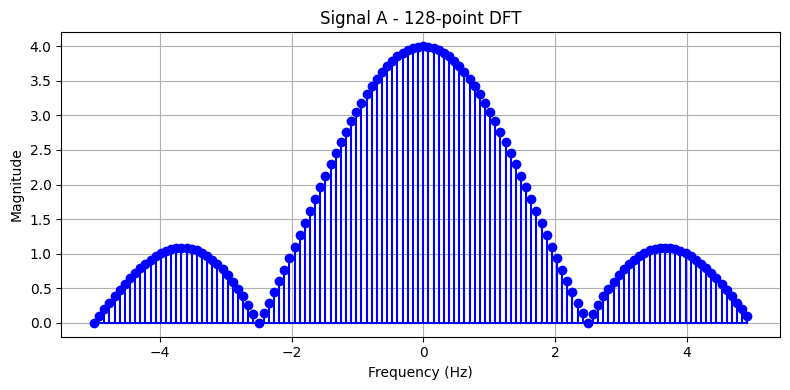


DFT Magnitude Analysis for Signal B: x[n] = {1, 0, 1, 0, 1, 0, 1, 0}


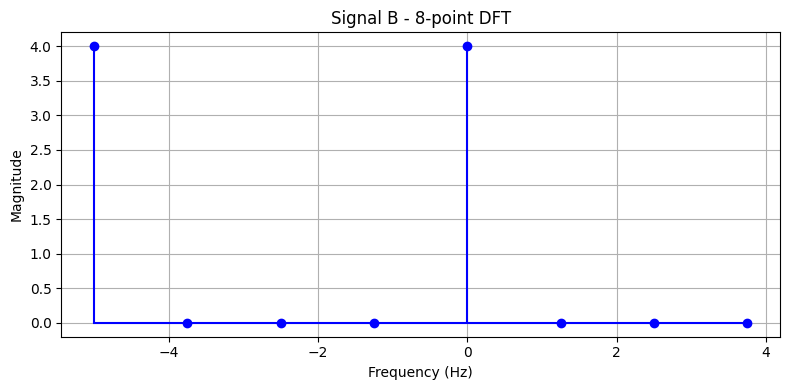

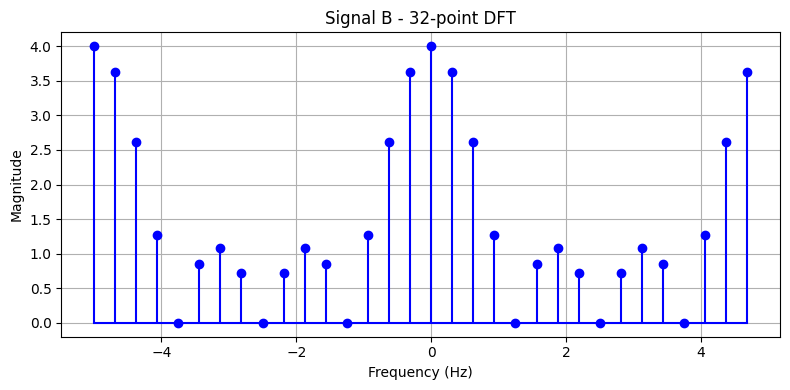

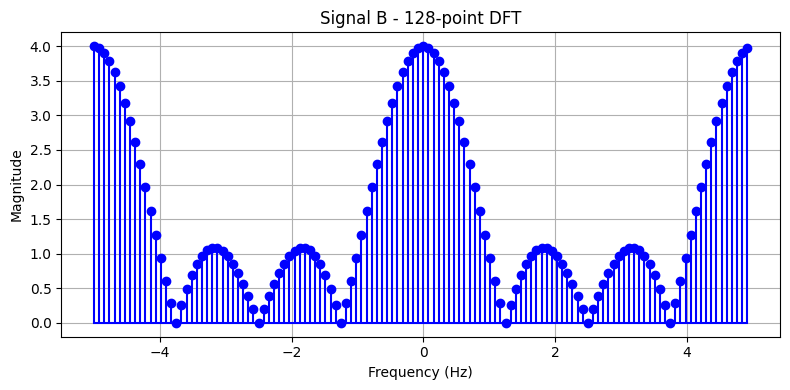

In [7]:
import numpy as np
import matplotlib.pyplot as plt

signal_a = np.array([1, 1, 1, 1, 0, 0, 0, 0])
signal_b = np.array([1, 0, 1, 0, 1, 0, 1, 0])

def compute_and_plot_dft_magnitude(signal, N, title_prefix, Fs=10):
    padded_signal = np.zeros(N)
    padded_signal[:len(signal)] = signal

    X = np.fft.fft(padded_signal)
    X_mag = np.abs(np.fft.fftshift(X))          # Shift zero frequency to center
    freqs = np.fft.fftshift(np.fft.fftfreq(N, d=1/Fs))  # Shifted frequency axis in Hz

    plt.figure(figsize=(8, 4))
    plt.stem(freqs, X_mag, 'b', markerfmt='bo', basefmt='-b')
    plt.title(f'{title_prefix} - {N}-point DFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("DFT Magnitude Analysis for Signal A: x[n] = {1, 1, 1, 1, 0, 0, 0, 0}")
for N in [8, 32, 128]:
    compute_and_plot_dft_magnitude(signal_a, N, "Signal A")

print("\nDFT Magnitude Analysis for Signal B: x[n] = {1, 0, 1, 0, 1, 0, 1, 0}")
for N in [8, 32, 128]:
    compute_and_plot_dft_magnitude(signal_b, N, "Signal B")

### 2. DFT Magnitude spectrum.



---

Discrete-time signals:

- Signal A: \( x[n] = \{1, 1, 1, 1, 0, 0, 0, 0\} \)
- Signal B: \( x[n] = \{1, 0, 1, 0, 1, 0, 1, 0\} \)

Find the Discrete Fourier Transform (DFT) of each signal using different DFT lengths:
- 8-point
- 32-point
- 128-point

The sampling frequency is given as:

$$
F_s = 10 \, \text{Hz}
$$

The DFT produces frequency components corresponding to:

$$
f_k = \frac{k}{N} F_s, \quad \text{for } k = 0, 1, ..., N-1
$$

These frequencies are mapped from −F_s/2 to +F_s/2 arranging the spectrum symmetrically around 0 Hz.

- **Signal A** is similar to low-pass spectrum since it's a short rectangular pulse.
- **Signal B** is a high-frequency, alternating pattern and dominant energy at specific frequencies.

Increasing the DFT length from 8 to 32 to 128 gives better frequency resolution.

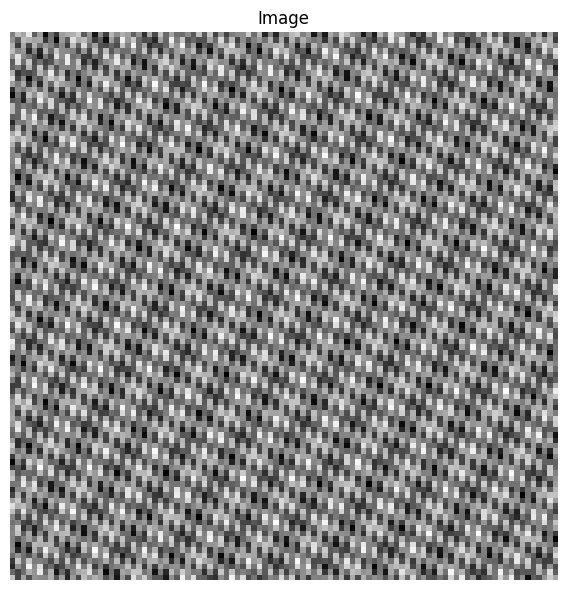

In [8]:
image = np.load('/Users/chandhu/Desktop/4th sem/image processing/A2/image_1.npy')
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Image")
plt.axis('off')
plt.tight_layout()
plt.show()

# 3. Part(a) Load and plot the image.

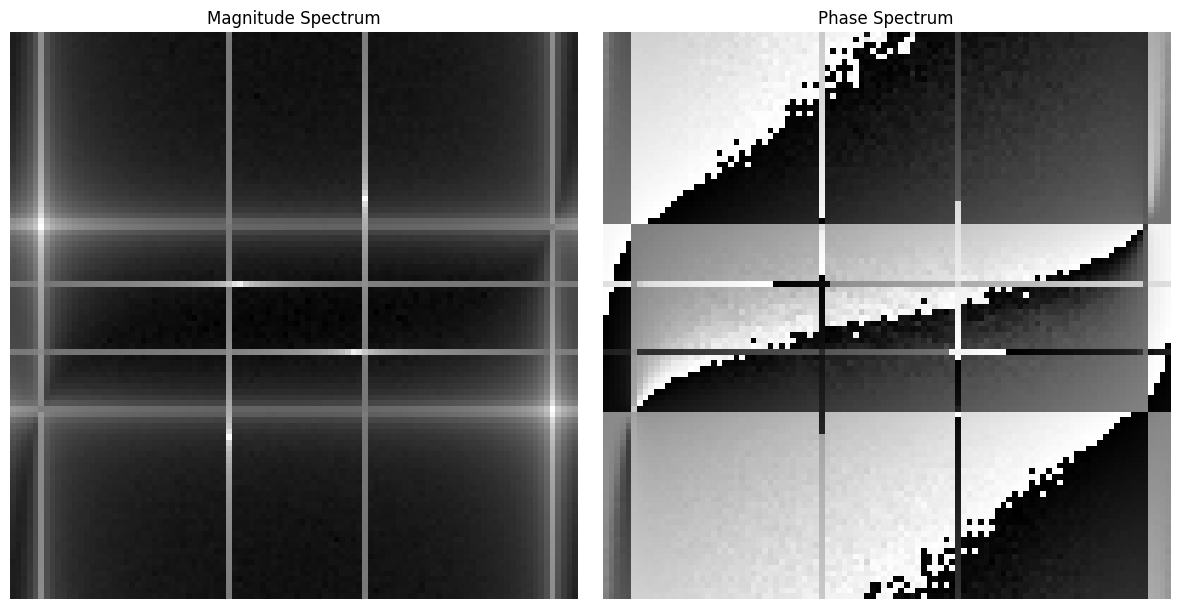

In [9]:
Xf = np.fft.fft2(image)
Xf_shifted = np.fft.fftshift(Xf)

magnitude = np.abs(Xf_shifted)
phase = np.angle(Xf_shifted)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.log1p(magnitude), cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(phase, cmap='gray')
plt.title("Phase Spectrum")
plt.axis('off')

plt.tight_layout()
plt.show()

### 3. Part(b) DFT of image, Magnitude and Phase spectrum.



---
**Magnitude Spectrum**:

A mostly dark image with some bright vertical and horizontal lines are observed.

Some brighter points along these lines or slightly off-axis are also there.

The vertical and horizontal bright lines mean the image contains repeated structures aligned with the horizontal and vertical directions.

The small bright spots away from the center are high-frequency components, which capture edges, texture, and fine patterns.

**Phase Spectrum**:

An irregular pattern of gray and black-and-white gradients are observed.

A distortion across the image with sharp edges and strange blocky transitions in some regions.

This plot shows the phase (angle) of each complex frequency component.

Phase contains the spatial alignment it encodes where each texture or pattern occurs in the image.

Though it looks noisy and hard to interpret visually, it’s essential for reconstructing the original image as it contains details abouyt it's phase.


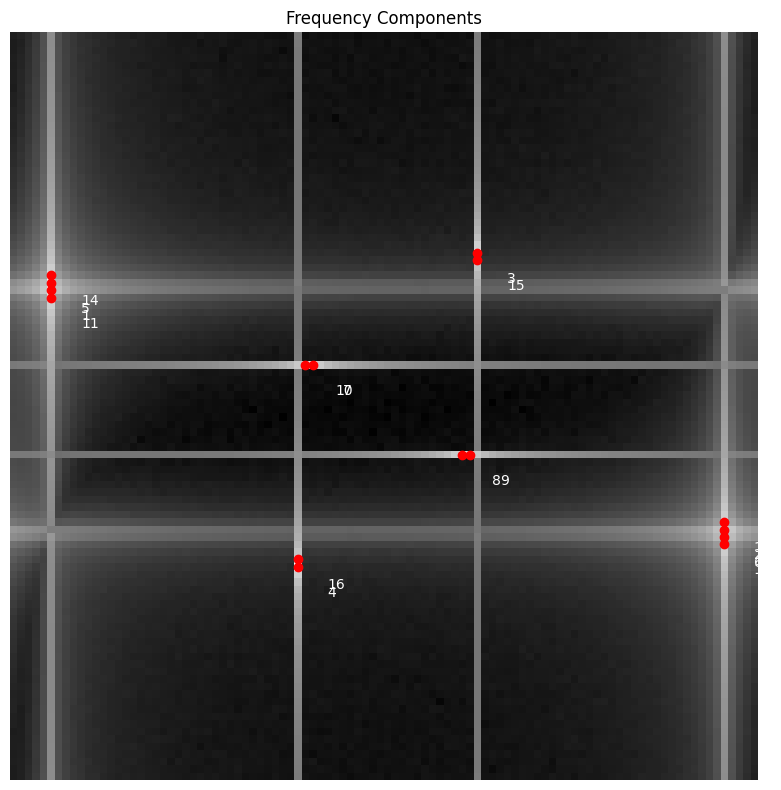

Top Significant Frequency Components (excluding DC):
No.         fx       fy    Magnitude
----------------------------------------
1       -0.450   -0.160     14482.56
2        0.450    0.160     14482.56
3        0.120   -0.210     13885.25
4       -0.120    0.210     13885.25
5       -0.450   -0.170     10360.53
6        0.450    0.170     10360.53
7       -0.100   -0.060      7654.41
8        0.100    0.060      7654.41
9        0.110    0.060      4941.11
10      -0.110   -0.060      4941.11
11      -0.450   -0.150      4261.47
12       0.450    0.150      4261.47
13       0.450    0.180      3818.47
14      -0.450   -0.180      3818.47
15       0.120   -0.200      3806.39
16      -0.120    0.200      3806.39


In [10]:

image = np.load('/Users/chandhu/Desktop/4th sem/image processing/A2/image_1.npy')

Xf = np.fft.fft2(image)
Xf_shifted = np.fft.fftshift(Xf)
magnitude = np.abs(Xf_shifted)
log_magnitude = np.log1p(magnitude)

rows, cols = image.shape
Fs = 1  
freq_y = np.fft.fftshift(np.fft.fftfreq(rows, d=1/Fs))
freq_x = np.fft.fftshift(np.fft.fftfreq(cols, d=1/Fs))
fx, fy = np.meshgrid(freq_x, freq_y)

threshold = np.max(magnitude) * 0.2
significant_indices = np.argwhere(magnitude > threshold)

components = []
for y, x in significant_indices:
    fx_val = fx[y, x]
    fy_val = fy[y, x]
    if fx_val == 0 and fy_val == 0:
        continue 
    mag = magnitude[y, x]
    components.append((fx_val, fy_val, mag, y, x))

components = sorted(components, key=lambda x: -x[2])

plt.figure(figsize=(10, 8))
plt.imshow(log_magnitude, cmap='gray')
plt.title("Frequency Components")


for i, (fx_val, fy_val, mag, y, x) in enumerate(components):
    plt.plot(x, y, 'ro', markersize=6)
    plt.text(x + 4, y + 4, str(i + 1), color='white', fontsize=10)

plt.axis('off')
plt.tight_layout()
plt.show()

print("Top Significant Frequency Components (excluding DC):")
print("{:<5} {:>8} {:>8} {:>12}".format("No.", "fx", "fy", "Magnitude"))
print("-" * 40)
for i, (fx_val, fy_val, mag, _, _) in enumerate(components):
    print("{:<5} {:>8.3f} {:>8.3f} {:>12.2f}".format(i + 1, fx_val, fy_val, mag))

### 3. Part(c) Frequency components in the image.



---
The output image is a log-magnitude spectrum that is Fourier transform visualized in grayscale
	
The bright spots are where a strong frequency exists.

The red dots are the positions of the top 16 strongest frequency components.

The pattern is symmetrical, which is expected for real-valued images.

These red dots are located along horizontal and vertical lines, meaning the image contains repeating sine patterns in the x and y directions.

fx and fy is the normalized spatial frequencies in the horizontal and vertical directions.
 
Magnitude is the strength of that frequency in the image.
	
Higher values = more dominant frequency.
	
These are sorted from strongest to weakest.


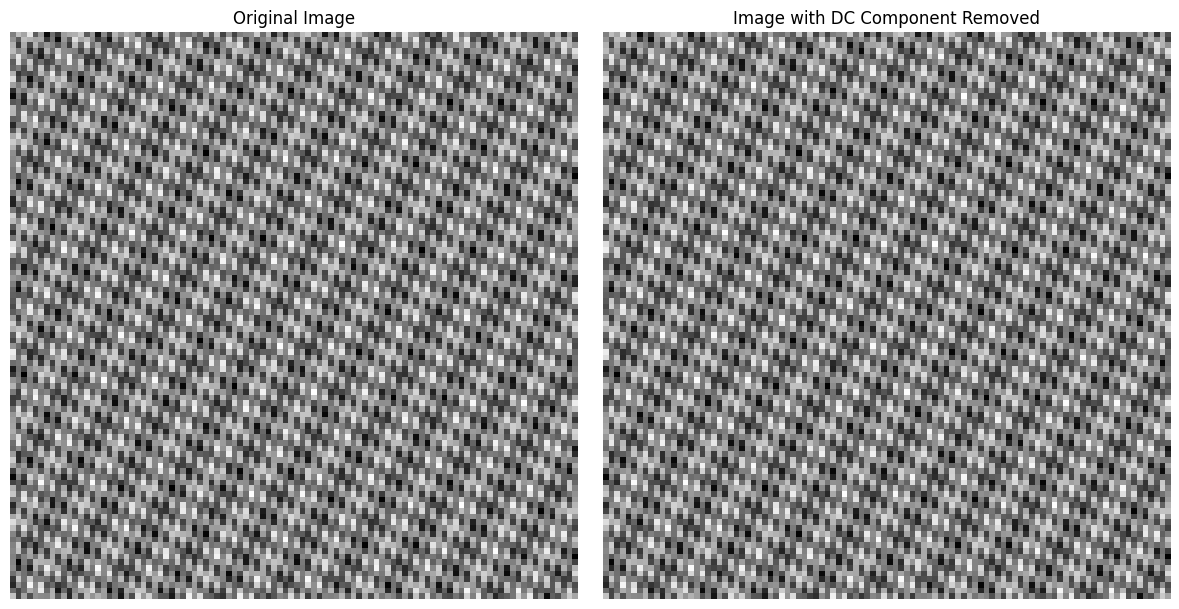

In [11]:
image = np.load('/Users/chandhu/Desktop/4th sem/image processing/A2/image_1.npy')

# Compute DFT and remove DC component
Xf = np.fft.fft2(image)
Xf_no_dc = Xf.copy()
Xf_no_dc[0, 0] = 0
image_no_dc = np.fft.ifft2(Xf_no_dc).real

# Plot both images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_no_dc, cmap='gray')
plt.title("Image with DC Component Removed")
plt.axis('off')

plt.tight_layout()
plt.show()

### 3. Part(d) Removing DC component from the image.



---
The DC component represents the average brightness (mean intensity) of the image. 

In the frequency domain, it is located at position [0,0] of the FFT result.

By setting Xf[0, 0] = 0, we effectively subtract the mean from the image.

### Observation:
The original image contains both the pattern and its baseline brightness.
The DC-removed image appears slightly darker. The pattern remains, but the average intensity is now zero.

This technique is useful in many image processing tasks where we want to remove lighting and enhance edges.